## Multi Class Logistic Regression  iris dataset

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook # bunu   3 boyut için aç kapa  yaptık
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

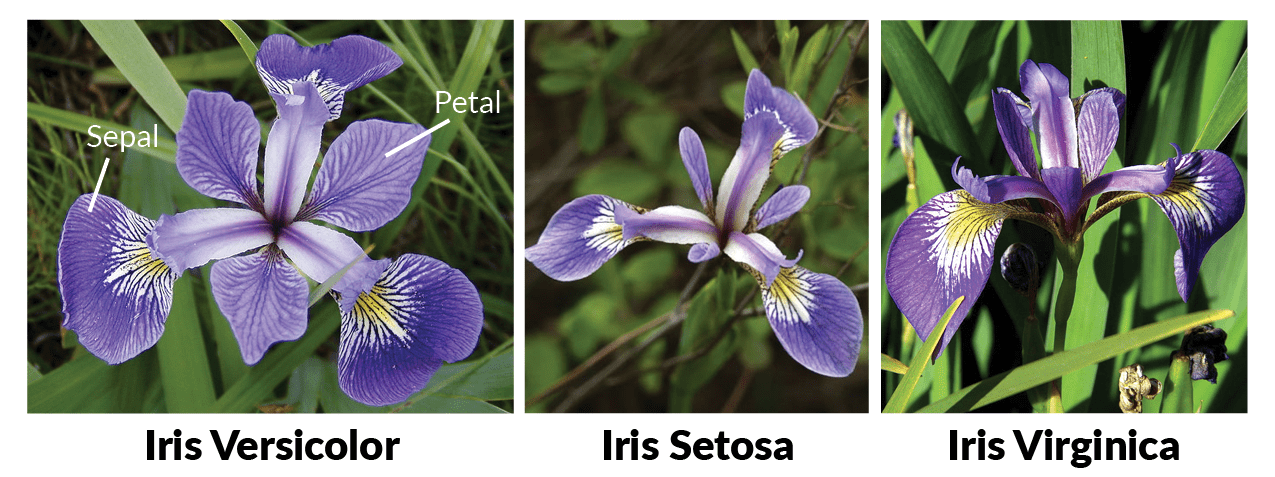

In [38]:
df = pd.read_csv('iris.csv')

In [39]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


In [40]:
df.info() # bu data setinde  ilk defa   string yani object data ile  çalışıcaz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.000,5.843,0.828,4.300,5.100,5.800,6.400,7.900
sepal_width,150.000,3.057,0.436,2.000,2.800,3.000,3.300,4.400
petal_length,150.000,3.758,1.765,1.000,1.600,4.350,5.100,6.900
petal_width,150.000,1.199,0.762,0.100,0.300,1.300,1.800,2.500


In [42]:
df['species'].value_counts()
# balanslı bir data

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

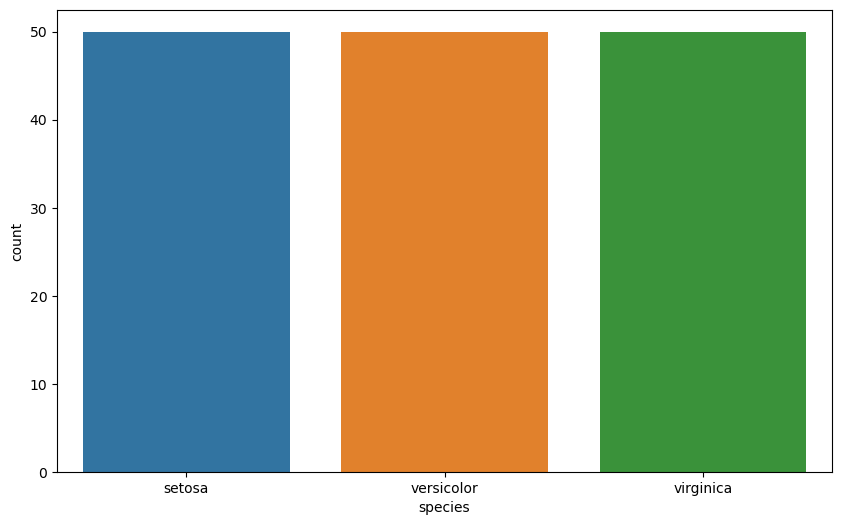

In [43]:
sns.countplot(df['species']);

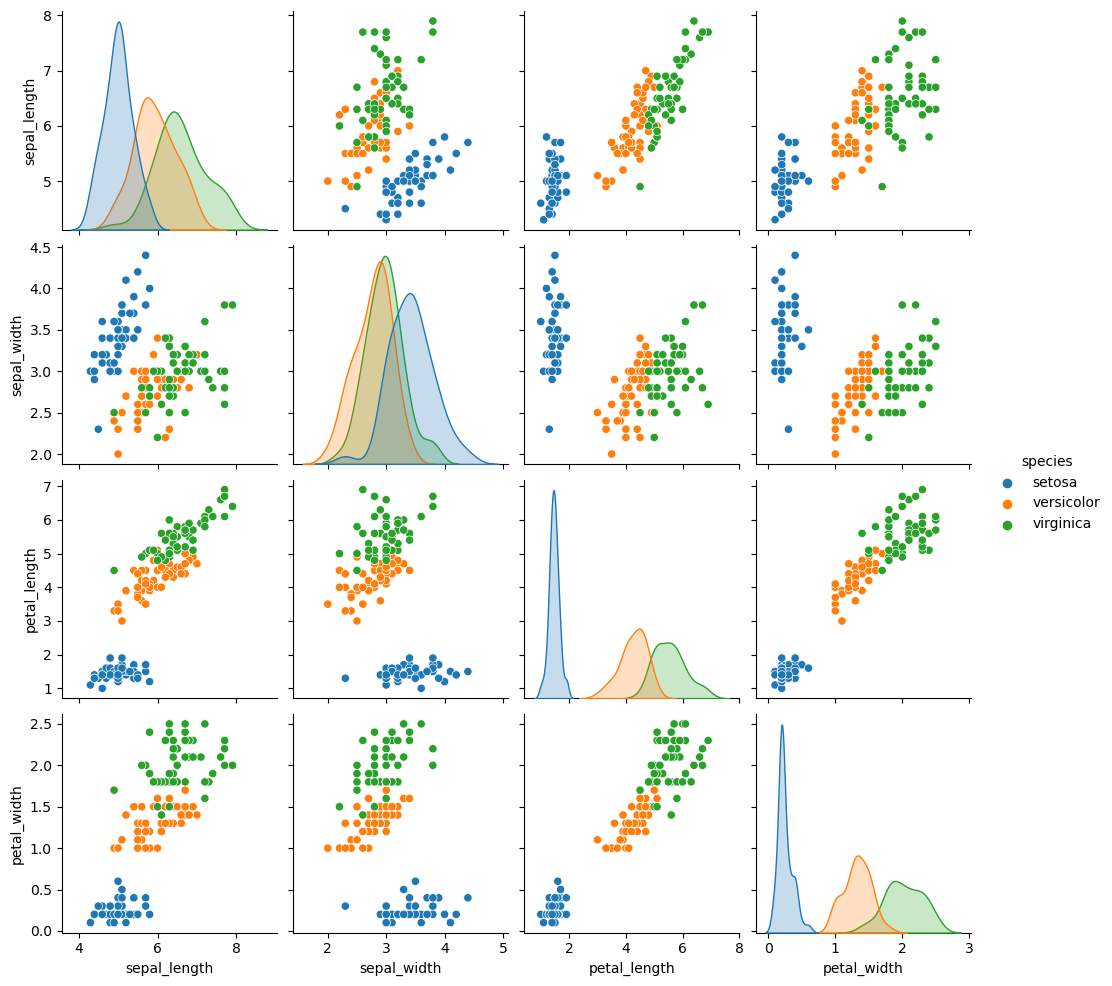

In [44]:
sns.pairplot(df,hue='species');

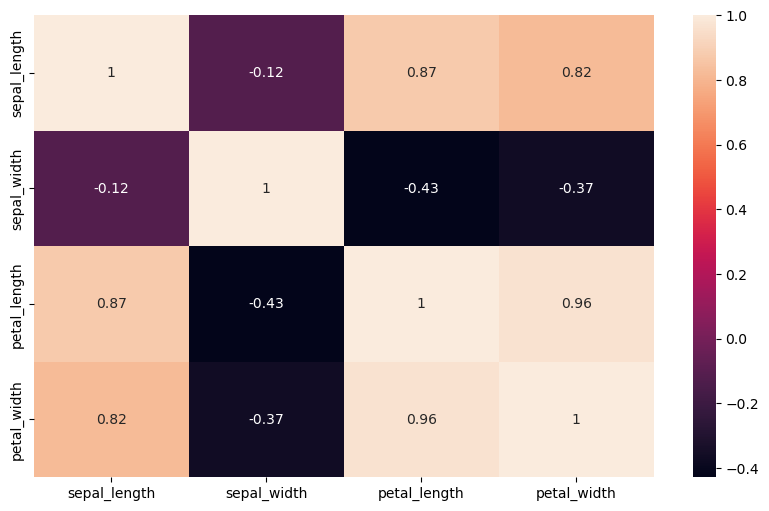

In [45]:
sns.heatmap(df.corr(),annot=True);

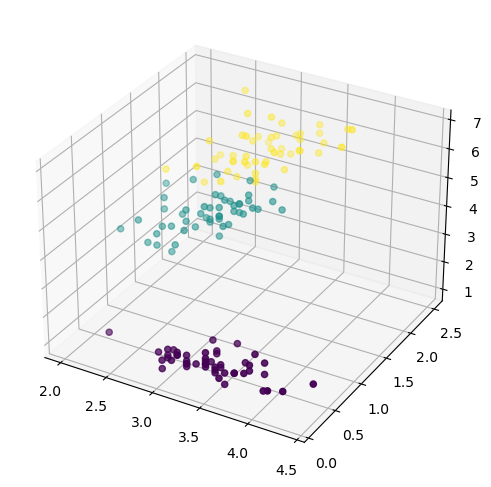

In [46]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
ax.scatter(df["sepal_width"], df["petal_width"], df["petal_length"], c=colors);

In [47]:
import plotly.express as px
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
fig = px.scatter_3d(df, x="sepal_width", y="petal_width", z="petal_length", color=colors)
fig.show()

# Train | Test Split and Scaling

In [48]:
X = df.drop('species',axis=1) #feature
y = df['species'] # target ayırdık

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# bundan sonra kütüphaneleri   en başta verceğiz  buralarda impor etmiyeceğiz

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [51]:
scaler = StandardScaler()

In [52]:
X_train_scaled = scaler.fit_transform(X_train) #  tek satırda  
X_test_scaled = scaler.transform(X_test) # 

# Modelling and Model Performance

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

## With Default Parameters

In [54]:
log_model = LogisticRegression()
#önce default  parameterlerle ilerlyeceğiz

In [55]:
log_model.fit(X_train_scaled,y_train) # tarin ettik datayı 
y_pred = log_model.predict(X_test_scaled)# modele test datasını verdik, tahmin aldık
y_pred

# sciklearn de  sadece targette     kategroik   string data varsa   modelde  çalışıyor türlei verdi. Featrue da  çılştırmıyor

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

In [56]:
y_pred_proba = log_model.predict_proba(X_test_scaled) # olasılıklara baktık olmzasa olmaz bunlar üzerinden
y_pred_proba
#bianry olasılıkta iki olasılık vardı, burada  ü  oalsılık var    
# yani tek satırda  3 ayrı column  sırasına göre  1.stosa, 2.verscicolor , 3.virginia  ihtimal   en büyüğü alıyoruz

array([[9.97574947e-01, 2.42503754e-03, 1.54293514e-08],
       [9.92629804e-01, 7.37006329e-03, 1.32922697e-07],
       [9.73790847e-01, 2.62066733e-02, 2.47982136e-06],
       [4.02847906e-04, 3.54599015e-01, 6.44998137e-01],
       [9.14885119e-03, 8.51714939e-01, 1.39136210e-01],
       [1.01797139e-03, 3.28773330e-01, 6.70208699e-01],
       [6.10449788e-04, 6.45974426e-01, 3.53415124e-01],
       [8.19190985e-03, 8.86796207e-01, 1.05011883e-01],
       [2.20541739e-04, 1.87962520e-01, 8.11816938e-01],
       [9.13848213e-01, 8.61499725e-02, 1.81402681e-06],
       [7.33058032e-04, 1.60762050e-01, 8.38504892e-01],
       [9.97950399e-01, 2.04959066e-03, 1.07662632e-08],
       [9.40317983e-01, 5.96797910e-02, 2.22606251e-06],
       [1.77758388e-06, 2.64146465e-02, 9.73583576e-01],
       [5.71832608e-03, 3.89263746e-01, 6.05017928e-01],
       [1.35583879e-02, 9.04991459e-01, 8.14501527e-02],
       [9.63103339e-02, 8.46121697e-01, 5.75679695e-02],
       [5.14009832e-02, 8.75025

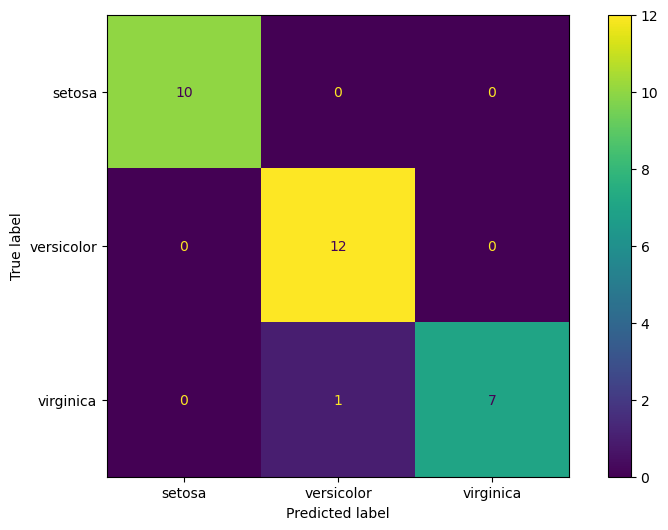

In [57]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

In [58]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [59]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Train_Set
[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.92      0.95        38
   virginica       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



## Cross Validate

In [60]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.950
test_precision_weighted   0.960
test_recall_weighted      0.950
test_f1_weighted          0.949
dtype: float64

## Cross Validate for Versicolor

In [61]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"])
precision_versicolor = make_scorer(precision_score, average = None, labels =["versicolor"])
recall_versicolor = make_scorer(recall_score, average = None, labels =["versicolor"])

In [62]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"f1_versicolor":f1_versicolor, 
                                                                   "precision_versicolor":precision_versicolor,
                                                                   "recall_versicolor":recall_versicolor}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_versicolor          0.924
test_precision_versicolor   0.940
test_recall_versicolor      0.925
dtype: float64

In [63]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]
test_data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,pred,pred_proba_setosa,pred_proba_versicolar,pred_proba_virginica
122,7.700,2.800,6.700,2.000,virginica,virginica,0.000,0.026,0.974
127,6.100,3.000,4.900,1.800,virginica,virginica,0.006,0.389,0.605
96,5.700,2.900,4.200,1.300,versicolor,versicolor,0.051,0.875,0.074
114,5.800,2.800,5.100,2.400,virginica,virginica,0.000,0.029,0.971
53,5.500,2.300,4.000,1.300,versicolor,versicolor,0.008,0.887,0.105
80,5.500,2.400,3.800,1.100,versicolor,versicolor,0.019,0.948,0.033
1,4.900,3.000,1.400,0.200,setosa,setosa,0.914,0.086,0.000
64,5.600,2.900,3.600,1.300,versicolor,versicolor,0.100,0.866,0.035
123,6.300,2.700,4.900,1.800,virginica,virginica,0.001,0.329,0.670
32,5.200,4.100,1.500,0.100,setosa,setosa,0.998,0.002,0.000


## With Best Parameters (GridsearchCV)

In [64]:
log_model = LogisticRegression(max_iter=5000)
penalty = ["l1", "l2"] # içine    iki hyperparameter  vedik
C = np.logspace(-1, 5, 20)
param_grid = {"penalty" : penalty,
             "C" : C}
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=5)
#scoring = f1_setosa = make_scorer(f1_score, average = None, labels =["setosa"])

In [65]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [67]:
grid_model.best_params_

{'C': 16.23776739188721, 'penalty': 'l2'}

In [68]:
grid_model.best_score_

0.9666666666666668

In [69]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

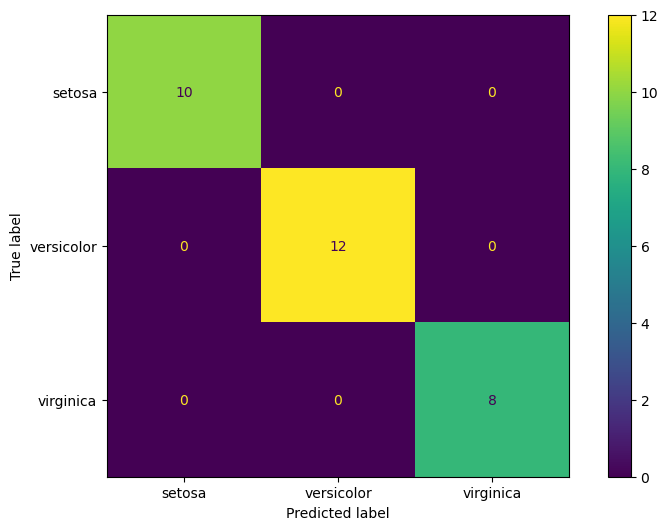

In [70]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)
plt.show()

In [71]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.97      0.97        38
   virginica       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



# ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [72]:
from sklearn.metrics import plot_roc_curve

In [ ]:
plot_roc_curve(grid_model, X_test_scaled, y_test); # hata veriri  ikiden fazla  clas  içerirse  hata verir
# güçlöü  kütühane  var    yellowbrick

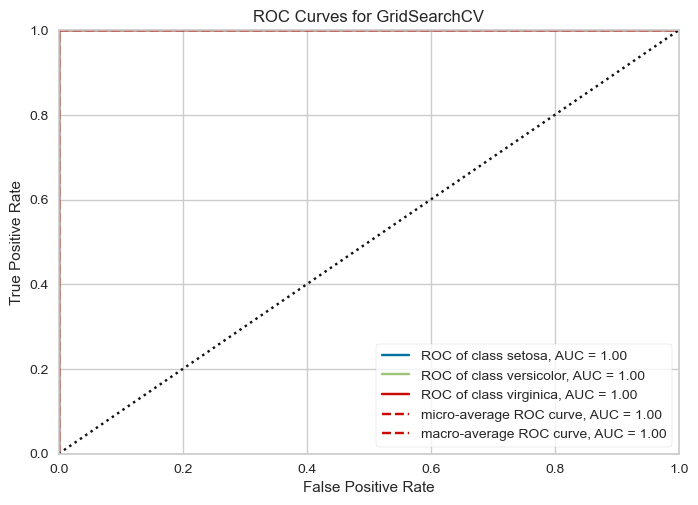

In [73]:
from yellowbrick.classifier import ROCAUC
model = grid_model
visualizer = ROCAUC(model)
visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

## interview   question

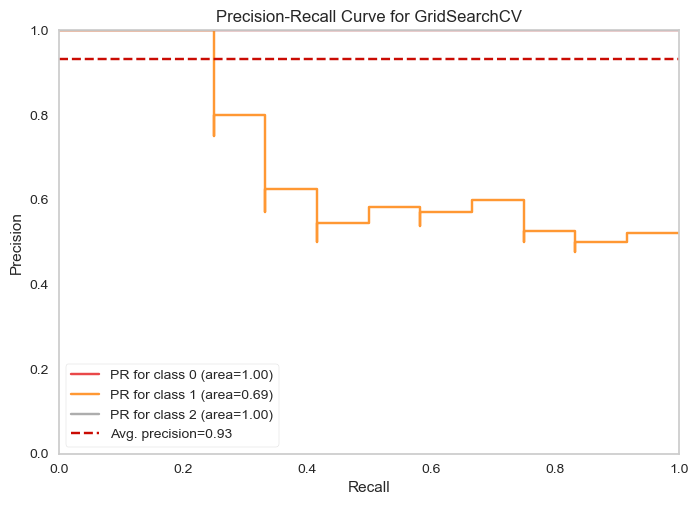

In [74]:
from yellowbrick.classifier import PrecisionRecallCurve
model = grid_model
viz = PrecisionRecallCurve(
    model,
    per_class=True,#buraya bunu vermezsek binary gibi çalışır.
    cmap="Set1"
)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show();

In [ ]:
unbalans datada    model sapıtmıştır 

## Final Model and Model Deployment ( Burada   önemli  acıklama 18. session 22:00 dakika)

In [78]:
scaler = StandardScaler().fit(X)#bütün datayı eğitiyorum scaler yaptık

In [79]:
import pickle
pickle.dump(scaler, open("scaler_iris", 'wb')) #scale modelimi kayıt ediyorum

In [80]:
## 22:17  kayıttan yaz 

In [81]:
X_scaled = scaler.transform(X) #  sonra  transform  yapıyorum
final_model = LogisticRegression().fit(X_scaled, y)#final modelimi oluşturuyorum

In [88]:
pickle.dump(final_model, open("final_model_iris", 'wb'))#onuda kayıt ediyorum

In [89]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.000,5.843,0.828,4.300,5.100,5.800,6.400,7.900
sepal_width,150.000,3.057,0.436,2.000,2.800,3.000,3.300,4.400
petal_length,150.000,3.758,1.765,1.000,1.600,4.350,5.100,6.900
petal_width,150.000,1.199,0.762,0.100,0.300,1.300,1.800,2.500


In [90]:
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
          "sepal_width": [2.2, 3, 4.2],
          "petal_length": [1.3, 4.3, 6.5],
          "petal_width": [0.2, 1.3, 2.3]
          }

In [91]:
sample = pd.DataFrame(my_dict)
sample

,sepal_length,sepal_width,petal_length,petal_width
0,4.500,2.200,1.300,0.200
1,5.800,3.000,4.300,1.300
2,7.500,4.200,6.500,2.300


In [92]:
scaler_iris = pickle.load(open("scaler_iris", "rb"))

In [93]:
sample_scaled = scaler_iris.transform(sample)
sample_scaled

array([[-1.62768839, -1.97355361, -1.39706395, -1.3154443 ],
       [-0.05250608, -0.13197948,  0.30805885,  0.13250973],
       [ 2.00734772,  2.63038172,  1.55848225,  1.44883158]])

In [95]:
final_model = pickle.load(open("final_model_iris", "rb"))

In [96]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [97]:
sample["pred"] = predictions
sample["pred_proba_setosa"] = predictions_proba[:,0]
sample["pred_proba_versicolor"] = predictions_proba[:,1]
sample["pred_proba_virginica"] = predictions_proba[:,2]
sample

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.500,2.200,1.300,0.200,setosa,0.712,0.288,0.000
1,5.800,3.000,4.300,1.300,versicolor,0.044,0.890,0.066
2,7.500,4.200,6.500,2.300,virginica,0.000,0.021,0.979


## THE END